<a href="https://www.kaggle.com/code/fiftythirtyfour/house-prices?scriptVersionId=133121335" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.drop('Id', axis=1, inplace=True)
target = 'SalePrice'
num = [x for x in df.columns if df.dtypes[x] in ('int64', 'float')]
cat = [x for x in df.columns if df.dtypes[x] == 'object']
num.remove(target)

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.3, random_state=0)

# Explore

In [7]:
corr = train.corr(numeric_only=True)
corr[target].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.784147
GrLivArea        0.725256
GarageCars       0.652939
GarageArea       0.645136
TotalBsmtSF      0.625144
1stFlrSF         0.610353
FullBath         0.572751
TotRmsAbvGrd     0.545386
YearBuilt        0.513410
YearRemodAdd     0.512146
GarageYrBlt      0.480878
MasVnrArea       0.480757
Fireplaces       0.472884
BsmtFinSF1       0.399025
LotFrontage      0.355834
2ndFlrSF         0.334791
OpenPorchSF      0.311353
WoodDeckSF       0.302006
HalfBath         0.279642
LotArea          0.258990
BsmtFullBath     0.235494
BsmtUnfSF        0.201937
BedroomAbvGr     0.191817
ScreenPorch      0.096552
3SsnPorch        0.058646
MoSold           0.045440
PoolArea         0.034580
LowQualFinSF    -0.006427
BsmtFinSF2      -0.016091
BsmtHalfBath    -0.019163
MiscVal         -0.026806
OverallCond     -0.036825
YrSold          -0.052135
MSSubClass      -0.081002
EnclosedPorch   -0.117486
KitchenAbvGr    -0.136058
Name: SalePrice, dtype: float64

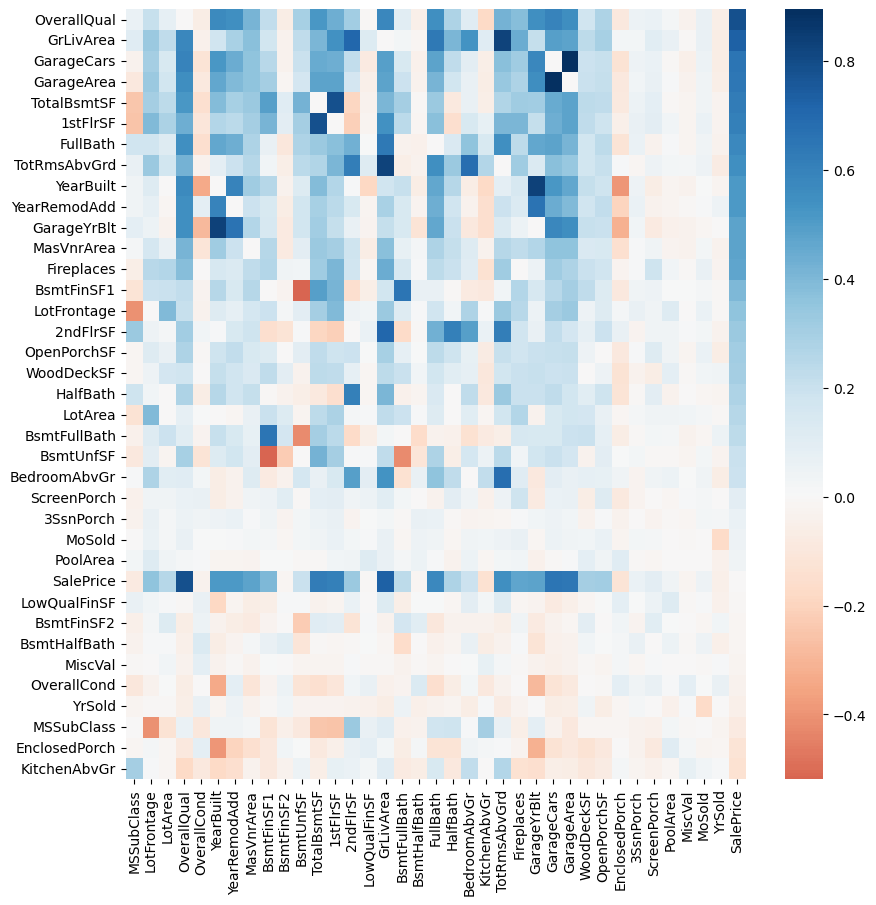

In [8]:
plt.figure(figsize=(10, 10))
np.fill_diagonal(corr.values, 0)
sns.heatmap(corr.sort_values(by=target, ascending=False), cmap='RdBu', center=0);

In [9]:
train[cat].isnull().sum().sort_values()

MSZoning            0
PavedDrive          0
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
SaleType            0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
SaleCondition       0
HouseStyle          0
Street              0
LotShape            0
RoofStyle           0
Utilities           0
LotConfig           0
LandContour         0
BldgType            0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
Electrical          1
MasVnrType          5
BsmtCond           24
BsmtQual           24
BsmtFinType1       24
BsmtExposure       24
BsmtFinType2       25
GarageType         54
GarageFinish       54
GarageQual         54
GarageCond         54
FireplaceQu       478
Fence             831
Alley             960
MiscFeature       978
PoolQC           1019
dtype: int64

In [10]:
train[num].isnull().sum().sort_values()

MSSubClass         0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
FullBath           0
GarageArea         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
WoodDeckSF         0
MoSold             0
BsmtHalfBath       0
GrLivArea          0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFullBath       0
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
BsmtFinSF2         0
YrSold             0
MasVnrArea         5
GarageYrBlt       54
LotFrontage      189
dtype: int64

# Pipeline

In [11]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [12]:
class DataSelect(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attributes]

In [13]:
num_pp = Pipeline([
    ('dataselect', DataSelect(num))
    , ('impute', SimpleImputer(strategy='mean'))
    , ('scaler', StandardScaler())
])

cat_pp = Pipeline([
    ('dataselect', DataSelect(cat))
    , ('encoder', OneHotEncoder())
])

pipe = FeatureUnion([
    ('num', num_pp)
#     , ('cat', cat_pp)
])

pipe.fit(train)
train_pre = pipe.transform(train)
test_pre = pipe.transform(test)

# Select Model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [15]:
machlist = [
    LinearRegression()
    , RandomForestRegressor(random_state=0)
]

def getScores(lst, X, y):
    scores = []
    for m in lst:
        m.fit(X, y)
        scores.append({
            'm': m
            , 'base': np.sqrt(-cross_val_score(m, X, y, scoring='neg_mean_squared_error').mean())
        })
    return pd.DataFrame(scores)

models = getScores(machlist, train_pre, train[target])
models.sort_values(by='base')

,m,base
1,"(DecisionTreeRegressor(max_features=1.0, rando...",30065.529668
0,LinearRegression(),34438.269248


In [16]:
model = models.iloc[1]['m']
model

RandomForestRegressor(random_state=0)

# Tune Model

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [19]:
params = {
    'random_state': [0]
    , 'n_estimators': [100, 200, 300]
    , 'max_features': [2, 4, 6, 8]
}
grid = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error')
grid.fit(train_pre, train[target])
grid.best_params_

{'max_features': 8, 'n_estimators': 300, 'random_state': 0}

In [20]:
model_tune = RandomForestRegressor(random_state=0, max_features=8, n_estimators=300)
model_tune.fit(train_pre, train[target])

RandomForestRegressor(max_features=8, n_estimators=300, random_state=0)

# Validate Model

In [21]:
scores = pd.Series({
    'trbase': np.sqrt(-cross_val_score(model, train_pre, train[target], scoring='neg_mean_squared_error').mean())
    ,'trtune': np.sqrt(-cross_val_score(model_tune, train_pre, train[target], scoring='neg_mean_squared_error').mean())
    ,'tebase': np.sqrt(-cross_val_score(model, test_pre, test[target], scoring='neg_mean_squared_error').mean())
    ,'tetune': np.sqrt(-cross_val_score(model_tune, test_pre, test[target], scoring='neg_mean_squared_error').mean())
})

scores['trchange'] = scores['trtune'] / scores['trbase'] - 1
scores['techange'] = scores['tetune'] / scores['tebase'] - 1
scores

trbase      30065.529668
trtune      29123.517148
tebase      40597.530184
tetune      39125.013302
trchange       -0.031332
techange       -0.036271
dtype: float64

# Submission

In [22]:
samp = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
subm = pd.DataFrame({
    'Id': samp['Id']
    , 'SalePrice': model_tune.predict(pipe.transform(samp))
}).to_csv('submission.csv', index=False)